In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, confusion_matrix, \
                            accuracy_score, precision_score,recall_score, f1_score                            
from IPython.core.interactiveshell import InteractiveShell
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 100
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option("display.max_rows", None)

In [3]:
# define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names
# read data
train = pd.read_csv('../Data/CMaps/train_FD001.txt',sep='\s+', header=None, names=col_names)
train.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [4]:
train.describe()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.300000e+00,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092,0.070985,22.082880,4.660829e-13,0.267087,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.300000e+00,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.300000e+00,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.300000e+00,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.300000e+00,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.300000e+00,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [5]:
# Remove those column as we can see that it's value is not changing
cols_to_drop = ['setting_3', 's_1', 's_5', 's_6', 's_10', 's_14', 's_16', 's_18', 's_19']
train=train.drop(cols_to_drop, axis=1)
# Adding RUL (Remining Useful Life) to the train dataset
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame
train = add_remaining_useful_life(train)
#train[sensor_names+['RUL']].head()
print(train.shape, (train.isna().sum()==0).all())
train.head(5)

(20631, 18) True


,unit_nr,time_cycles,setting_1,setting_2,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_15,s_17,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187


<AxesSubplot:>

Text(0.5, 0, 'RUL')

Text(0, 0.5, 'frequency')

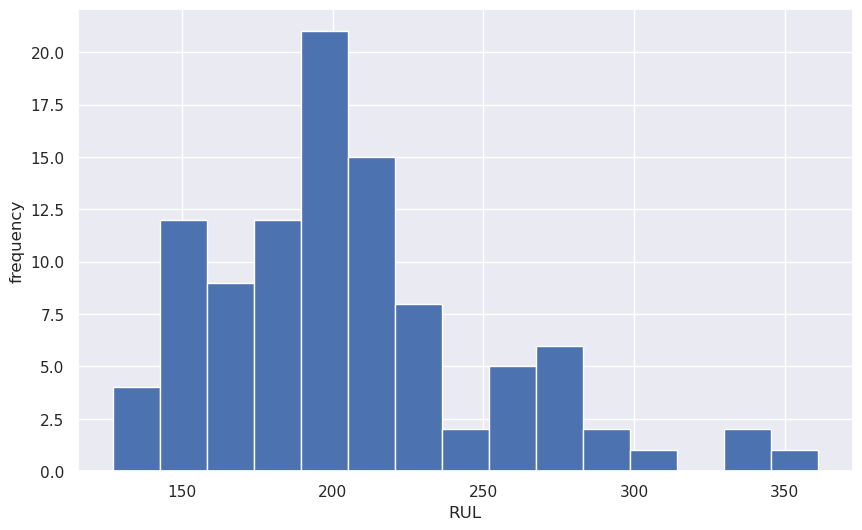

In [6]:
# distribution of RUL, similar to the 'describe function' of time_cycles above, but visual
df_max_rul = train[['unit_nr', 'RUL']].groupby('unit_nr').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(10,6))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

In [7]:
# Checking how values RUL are distributed into various quantiles.
train['RUL'].quantile([.1, .25, .5, .75, 0.9])

0.10     20.0
0.25     51.0
0.50    103.0
0.75    155.0
0.90    198.0
Name: RUL, dtype: float64

In [8]:
train['Class'] = pd.cut(x=train['RUL'], bins=[-1,51,103,155,361], labels=['Inception','Healthy','Mature','Attention_Required'])
print(train.shape)
train.Class.head()

(20631, 19)


0    Attention_Required
1    Attention_Required
2    Attention_Required
3    Attention_Required
4    Attention_Required
Name: Class, dtype: category
Categories (4, object): ['Inception' < 'Healthy' < 'Mature' < 'Attention_Required']

In [9]:
# Splitting of Independent & Dependent Variable and train input and output data
print(len(train['unit_nr'].unique()))
train_id, validate_id = train_test_split(train['unit_nr'].unique(), test_size=0.33, random_state=42)
print(train_id, validate_id)
X_train = train[train['unit_nr'].isin(train_id)]
X_validate = train[train['unit_nr'].isin(validate_id)]
y_train = train[train['unit_nr'].isin(train_id)].Class
y_validate = train[train['unit_nr'].isin(validate_id)].Class
X_train = X_train.drop(axis=0, columns=['Class','unit_nr','time_cycles','RUL'])
X_validate = X_validate.drop(axis=0, columns=['Class','unit_nr','time_cycles','RUL'])
X_train.shape, X_validate.shape, y_train.shape, y_validate.shape

100
[ 29  94   6  67  66  36  17  50  35   8  96  28  20  82  26  63  14  25
   4  18  39   9  79   7  65  37  90  57 100  55  44  51  68  47  69  62
  98  80  42  59  49  99  58  76  33  95  60  64  85  38  30   2  53  22
   3  24  88  92  75  87  83  21  61  72  15  93  52] [84 54 71 46 45 40 23 81 11  1 19 31 74 34 91  5 77 78 13 32 56 89 27 43
 70 16 41 97 10 73 12 48 86]


((13828, 15), (6803, 15), (13828,), (6803,))

In [10]:
num_of_classes = len(train.Class.unique())
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_validate = le.fit_transform(y_validate)
print(y_train, y_validate)
xgb = XGBClassifier()
xgb.fit(X=X_train, y=y_train)

[0 0 0 ... 2 2 2] [0 0 0 ... 2 2 2]
[10:48:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [11]:
def evaluation(model, X, y, set="train"):
    y_hat = model.predict(X)
    lb = preprocessing.LabelBinarizer()
    y_lb = lb.fit_transform(y)
    y_hat_lb = lb.transform(y_hat)
    #print(y_lb, y_hat_lb)
    print(f"roc score for {set} dataset: ", roc_auc_score(y_lb, y_hat_lb, average='macro'))
    print(f'Acc Score for {set} dataset: ', accuracy_score(y_lb, y_hat_lb))
    print(f'Precision Score for {set} dataset: ', precision_score(y_lb, y_hat_lb, average='macro'))
    print(f'Recall Score for {set} dataset: ', recall_score(y_lb, y_hat_lb, average='macro'))
    print(f'f1 score for {set} dataset: ', f1_score(y_lb, y_hat_lb, average='macro'))

In [12]:
evaluation(xgb, X_train, y_train, set='train')
evaluation(xgb, X_validate, y_validate, set='validate')

roc score for train dataset:  0.9406385447024939
Acc Score for train dataset:  0.9111223604281169
Precision Score for train dataset:  0.9130374238034707
Recall Score for train dataset:  0.9108833777281111
f1 score for train dataset:  0.911044701705492
roc score for validate dataset:  0.7182812961598686
Acc Score for validate dataset:  0.5784212847273262
Precision Score for validate dataset:  0.5727010028946317
Recall Score for validate dataset:  0.5769952904091421
f1 score for validate dataset:  0.574206643360785


In [13]:
# Final Results in the form of dataset
output = pd.DataFrame()
output['Expected Output'] = y_validate
output['Predicted Output'] = xgb.predict(X_validate)
output.tail()

,Expected Output,Predicted Output
6798,2,2
6799,2,2
6800,2,2
6801,2,2
6802,2,2


In [14]:
test = pd.read_csv('../Data/CMaps/test_FD001.txt', sep='\s+', header=None, names=col_names)
test.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [15]:
X_test = test.groupby('unit_nr').last().reset_index().drop(cols_to_drop, axis=1)
print(X_test.shape)
num_test_machines = len(X_test.unit_nr.unique())
print(num_test_machines)
X_test = X_test.drop(axis=0, columns=['unit_nr', 'time_cycles'])
X_test.shape

(100, 17)
100


(100, 15)

In [16]:
rul_pred = xgb.predict(X_test).reshape(-1)
rul_pred.shape

(100,)

In [18]:
y_true = pd.read_csv('../Data/CMaps/RUL_FD001.txt', delim_whitespace=True, names=["RUL"])
print(y_true.shape)
y_true['Class'] = pd.cut(x=y_true['RUL'], bins=[-1,51,103,155,361], labels=['Inception','Healthy','Mature','Attention_Required'])
y_true['Class'] = le.fit_transform(y_true['Class'])
y_true.tail()

(100, 1)


,RUL,Class
95,137,2
96,82,0
97,59,0
98,117,2
99,20,1


In [19]:
evaluation(xgb, X_test, y_true.Class, set="test")

roc score for test dataset:  0.37730387357253026
Acc Score for test dataset:  0.1
Precision Score for test dataset:  0.15333333333333332
Recall Score for test dataset:  0.09754689754689755
f1 score for test dataset:  0.11870428422152558


In [20]:
lgmb = LGBMClassifier(learning_rate=0.01, n_estimators=5000, num_leaves=100, num_class=num_of_classes,
                          objective='multiclass', random_state=50, n_jobs=-1)
lgmb.fit(X_train, y_train)
evaluation(lgmb, X_train, y_train, set='train')
evaluation(lgmb, X_validate, y_validate, set='validate')
evaluation(lgmb, X_test, y_true.Class, set="test")

LGBMClassifier(learning_rate=0.01, n_estimators=5000, num_class=4,
               num_leaves=100, objective='multiclass', random_state=50)

roc score for train dataset:  1.0
Acc Score for train dataset:  1.0
Precision Score for train dataset:  1.0
Recall Score for train dataset:  1.0
f1 score for train dataset:  1.0
roc score for validate dataset:  0.7122959495362243
Acc Score for validate dataset:  0.5694546523592533
Precision Score for validate dataset:  0.5652773369522752
Recall Score for validate dataset:  0.5680030090077708
f1 score for validate dataset:  0.5661044684621861
roc score for test dataset:  0.37267970542773
Acc Score for test dataset:  0.1
Precision Score for test dataset:  0.135632183908046
Recall Score for test dataset:  0.09870129870129869
f1 score for test dataset:  0.11300097751710654


In [21]:
# we want to try the same multi-class with deep learning used one
train['class_1'] = [1 if i < 50 else 0 for i in train.RUL]
train['class_2'] = train['class_1']
train['class_2'] = np.where(train.RUL < 25, 2, train['class_2'])
print(train.shape)
train.head()

(20631, 21)


,unit_nr,time_cycles,setting_1,setting_2,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_15,s_17,s_20,s_21,RUL,Class,class_1,class_2
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191,Attention_Required,0,0
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190,Attention_Required,0,0
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189,Attention_Required,0,0
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188,Attention_Required,0,0
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187,Attention_Required,0,0


In [24]:
# Splitting of Independent & Dependent Variable and train input and output data
print(len(train['unit_nr'].unique()))
train_id, validate_id = train_test_split(train['unit_nr'].unique(), test_size=0.33, random_state=42)
print(train_id, validate_id)
X_train = train[train['unit_nr'].isin(train_id)]
X_validate = train[train['unit_nr'].isin(validate_id)]
y_train = train[train['unit_nr'].isin(train_id)].class_2
y_validate = train[train['unit_nr'].isin(validate_id)].class_2
X_train = X_train.drop(axis=0, columns=['class_1','class_2','Class','unit_nr','time_cycles','RUL'])
X_validate = X_validate.drop(axis=0, columns=['class_1','class_2','Class','unit_nr','time_cycles','RUL'])
X_train.shape, X_validate.shape, y_train.shape, y_validate.shape

100
[ 29  94   6  67  66  36  17  50  35   8  96  28  20  82  26  63  14  25
   4  18  39   9  79   7  65  37  90  57 100  55  44  51  68  47  69  62
  98  80  42  59  49  99  58  76  33  95  60  64  85  38  30   2  53  22
   3  24  88  92  75  87  83  21  61  72  15  93  52] [84 54 71 46 45 40 23 81 11  1 19 31 74 34 91  5 77 78 13 32 56 89 27 43
 70 16 41 97 10 73 12 48 86]


((13828, 15), (6803, 15), (13828,), (6803,))

In [25]:
num_of_classes = len(train.class_2.unique())
xgb.fit(X=X_train, y=y_train)

[10:58:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [26]:
evaluation(xgb, X_train, y_train, set='train')
evaluation(xgb, X_validate, y_validate, set='validate')

roc score for train dataset:  0.9923584393230994
Acc Score for train dataset:  0.9962395140295054
Precision Score for train dataset:  0.9981801301535344
Recall Score for train dataset:  0.9898189335817572
f1 score for train dataset:  0.9939223136823823
roc score for validate dataset:  0.8620187663841733
Acc Score for validate dataset:  0.8988681464059973
Precision Score for validate dataset:  0.797774169218935
Recall Score for validate dataset:  0.7973566050569737
f1 score for validate dataset:  0.7973695361225452


In [27]:
output = pd.DataFrame()
output['Expected Output2'] = y_validate
output['Predicted Output2'] = xgb.predict(X_validate)
output.tail()

,Expected Output2,Predicted Output2
20085,2,2
20086,2,2
20087,2,2
20088,2,2
20089,2,2


In [28]:
rul_pred2 = xgb.predict(X_test).reshape(-1)
rul_pred2.shape

(100,)

In [29]:
y_test = pd.read_csv('../Data/CMaps/RUL_FD001.txt', delim_whitespace=True, names=["RUL"])
print(y_test.shape)
# we want to try the same multi-class with deep learning used one
y_test['class_1'] = [1 if i < 50 else 0 for i in y_test.RUL]
y_test['class_2'] = y_test['class_1']
y_test['class_2'] = np.where(y_test.RUL < 25, 2, y_test['class_2'])
print(y_test.shape)
y_test.head()

(100, 1)
(100, 3)


,RUL,class_1,class_2
0,112,0,0
1,98,0,0
2,69,0,0
3,82,0,0
4,91,0,0


In [30]:
evaluation(xgb, X_test, y_test.class_2, set="test")

roc score for test dataset:  0.8237313734784003
Acc Score for test dataset:  0.87
Precision Score for test dataset:  0.7558179837591602
Recall Score for test dataset:  0.7337206652996127
f1 score for test dataset:  0.743846919903258


In [31]:
confusion_matrix(y_test.class_2, rul_pred2)

array([[67,  3,  0],
       [ 4,  5,  2],
       [ 1,  3, 15]])

In [32]:
lgmb2 = LGBMClassifier(learning_rate=0.01, n_estimators=5000, num_leaves=100, num_class=num_of_classes,
                      objective='multiclass', random_state=50, n_jobs=-1)
lgmb2.fit(X_train, y_train)
evaluation(lgmb2, X_train, y_train, set='train')
evaluation(lgmb2, X_validate, y_validate, set='validate')
evaluation(lgmb2, X_test, y_test.class_2, set="test")

LGBMClassifier(learning_rate=0.01, n_estimators=5000, num_class=3,
               num_leaves=100, objective='multiclass', random_state=50)

roc score for train dataset:  1.0
Acc Score for train dataset:  1.0
Precision Score for train dataset:  1.0
Recall Score for train dataset:  1.0
f1 score for train dataset:  1.0
roc score for validate dataset:  0.8525063172198853
Acc Score for validate dataset:  0.89519329707482
Precision Score for validate dataset:  0.7890303308818569
Recall Score for validate dataset:  0.7825046506203114
f1 score for validate dataset:  0.7853568932754594
roc score for test dataset:  0.8366868902416572
Acc Score for test dataset:  0.87
Precision Score for test dataset:  0.7762053087757312
Recall Score for test dataset:  0.7592617908407382
f1 score for test dataset:  0.7644376899696049


In [33]:
rul_pred3 = lgmb2.predict(X_test).reshape(-1)
confusion_matrix(y_test.class_2, rul_pred3)

array([[66,  4,  0],
       [ 4,  6,  1],
       [ 1,  3, 15]])